B반 양명철

In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# # 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor

# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


# 의사결정나무

In [2]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
df_raw= pd.read_csv("/home/pirl/test/BigData/Concrete.csv", encoding='euc-kr')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# 목표 변수, 설명변수 데이터 지정
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis = 1, inplace = False)

In [4]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.6, random_state = 1234)

df_validation_x, df_test_x, df_validation_y, df_test_y = train_test_split(df_test_x, df_test_y
                                                               , test_size = 0.5, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))

print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

print("test data X size : {}".format(df_test_x.shape))
print("test data X size : {}".format(df_test_y .shape))

train data X size : (412, 8)
train data Y size : (412,)
validation data X size : (309, 8)
validation data Y size : (309,)
test data X size : (309, 8)
test data X size : (309,)


In [5]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

# validation 데이터 설명력
print("Score on validation set: {:.3f}".format(tree_uncustomized.score(df_validation_x, df_validation_y)))

# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.995
Score on validation set: 0.787
Score on test set: 0.812


### 모델 Parameter 조정
- min_samples_leaf: 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

    MinSamplesLeaf  TrainScore  ValidationScore
0                1       0.995            0.787
1                2       0.975            0.786
2                3       0.949            0.787
3                4       0.932            0.775
4                5       0.910            0.803
5                6       0.894            0.784
6                7       0.882            0.769
7                8       0.872            0.764
8                9       0.846            0.748
9               10       0.837            0.751
10              11       0.832            0.741
11              12       0.822            0.728
12              13       0.801            0.731
13              14       0.793            0.726
14              15       0.777            0.698
15              16       0.776            0.698
16              17       0.769            0.691
17              18       0.757            0.670
18              19       0.752            0.674


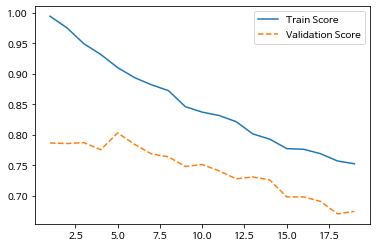

In [6]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)] #참조: para_leaf: [1,2,3,...,19]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_validation_x, df_validation_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = test_score

# 모델 설명력 확인
print(df_score_leaf.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Validation Score")
plt.legend()


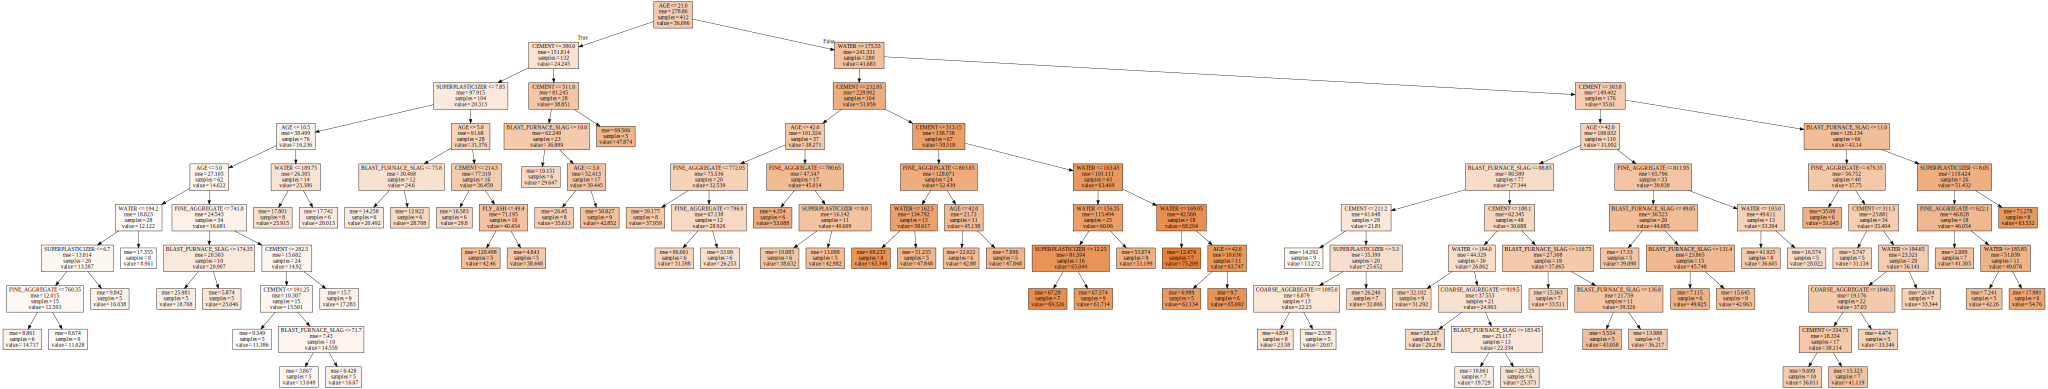

In [8]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 노드의 최소 자료 = 5 모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names= v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

    MinSamplesSplit  TrainScore  Validation
0                 4       0.894       0.784
1                 6       0.894       0.784
2                 8       0.894       0.784
3                10       0.894       0.784
4                12       0.894       0.784
5                14       0.885       0.769
6                16       0.884       0.769
7                18       0.872       0.764
8                20       0.859       0.746
9                22       0.848       0.745
10               24       0.848       0.745
11               26       0.828       0.739
12               28       0.813       0.728
13               30       0.791       0.702
14               32       0.789       0.704
15               34       0.781       0.701
16               36       0.778       0.697
17               38       0.765       0.674
18               40       0.765       0.674
19               42       0.755       0.662
20               44       0.748       0.665
21               46       0.748 

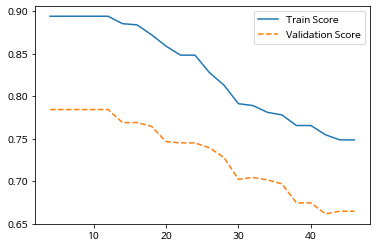

In [9]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분리노드의 최소 자료수
para_split = [n_split*2 for n_split in range(2,24)]  # 참조: para_split: [2,6,8,...,38]


for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=6
                                 , min_samples_split = v_min_samples_split)

    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_validation_x, df_validation_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["Validation"] = test_score

# 모델 설명력 확인
print(df_score_split.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Validation Score")
plt.legend()

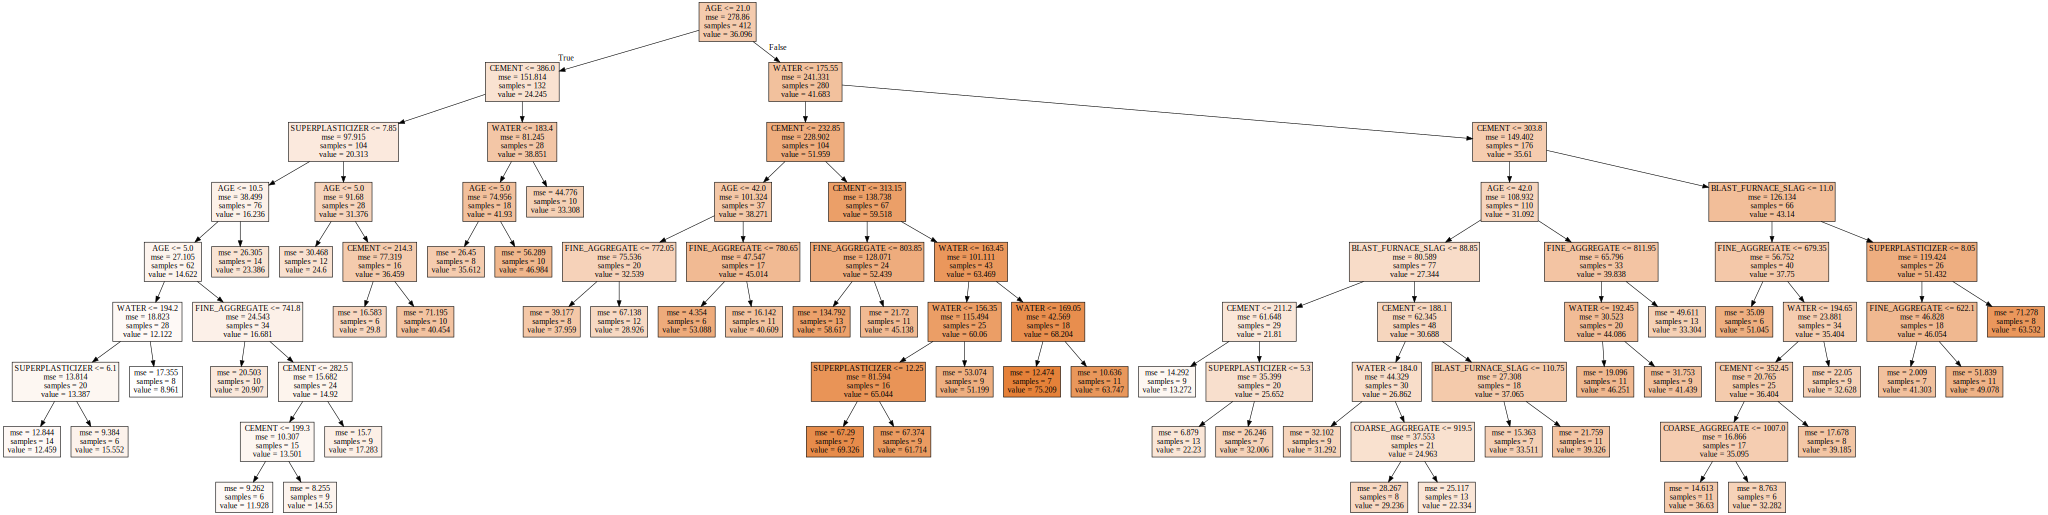

In [10]:
# 분리 노드의 최소 자료 수 = 28모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 6, min_samples_split=15)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = "tree_split.dot",
               feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### max_depth: 최대 깊이 변경에 따른 모델 성능

    Depth  TrainScore  TestScore
0       1       0.237      0.210
1       2       0.455      0.371
2       3       0.646      0.595
3       4       0.753      0.695
4       5       0.830      0.729
5       6       0.870      0.765
6       7       0.881      0.770
7       8       0.884      0.767
8       9       0.884      0.767
9      10       0.884      0.767
10     11       0.884      0.767
11     12       0.884      0.767
12     13       0.884      0.767
13     14       0.884      0.767
14     15       0.884      0.767
15     16       0.884      0.767
16     17       0.884      0.767
17     18       0.884      0.767
18     19       0.884      0.767
19     20       0.884      0.767


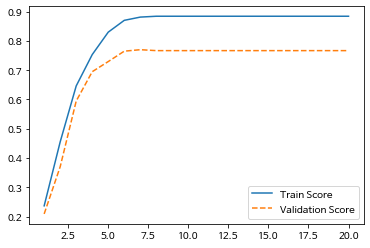

In [11]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1,21)]  # 참조: para_depth: [1,2,3,...,10]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=6, min_samples_split=15
                                 , max_depth= v_max_depth)

    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_depth.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Validation Score")
plt.legend()

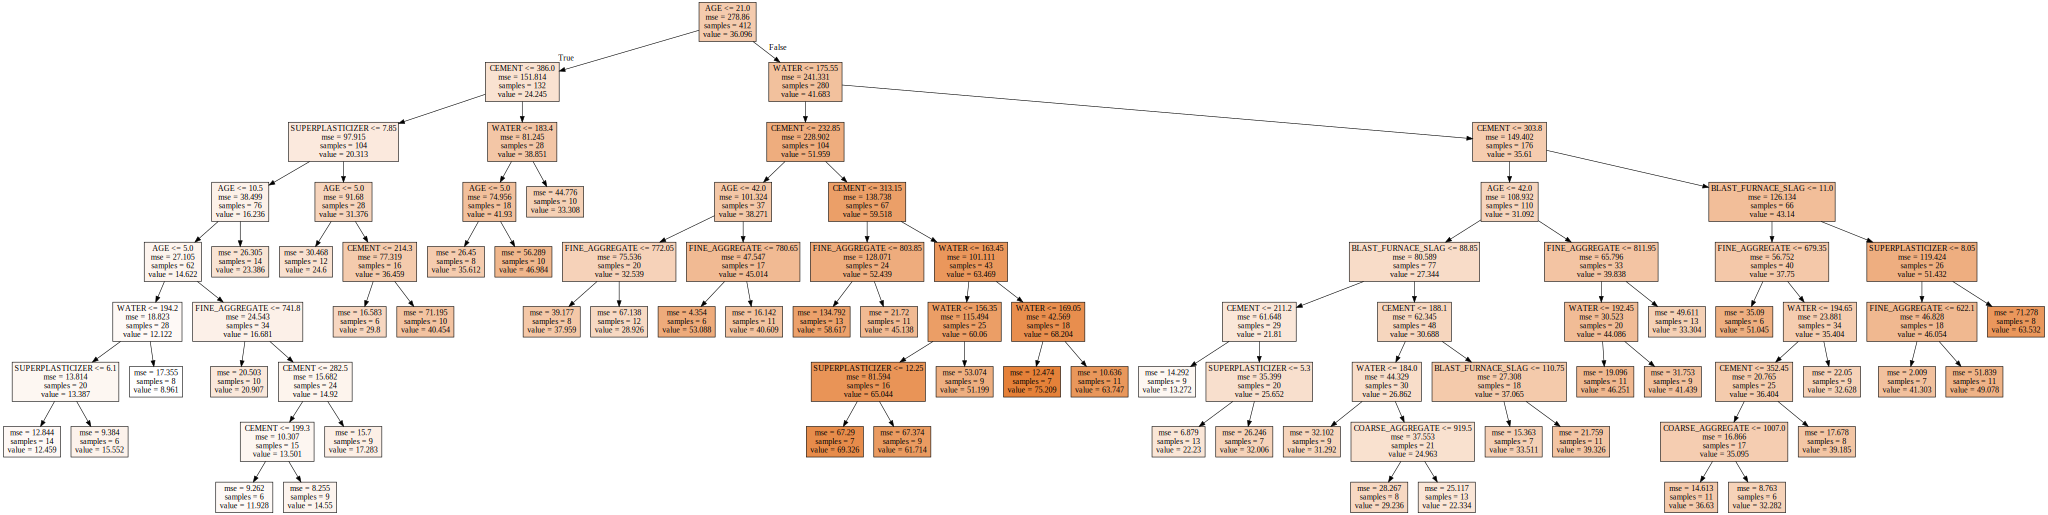

In [12]:
# 최대 깊이 = 6 모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 6, min_samples_split=15, max_depth =8)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = "tree_depth.dot",
               feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### step 3 최종 모델 선정

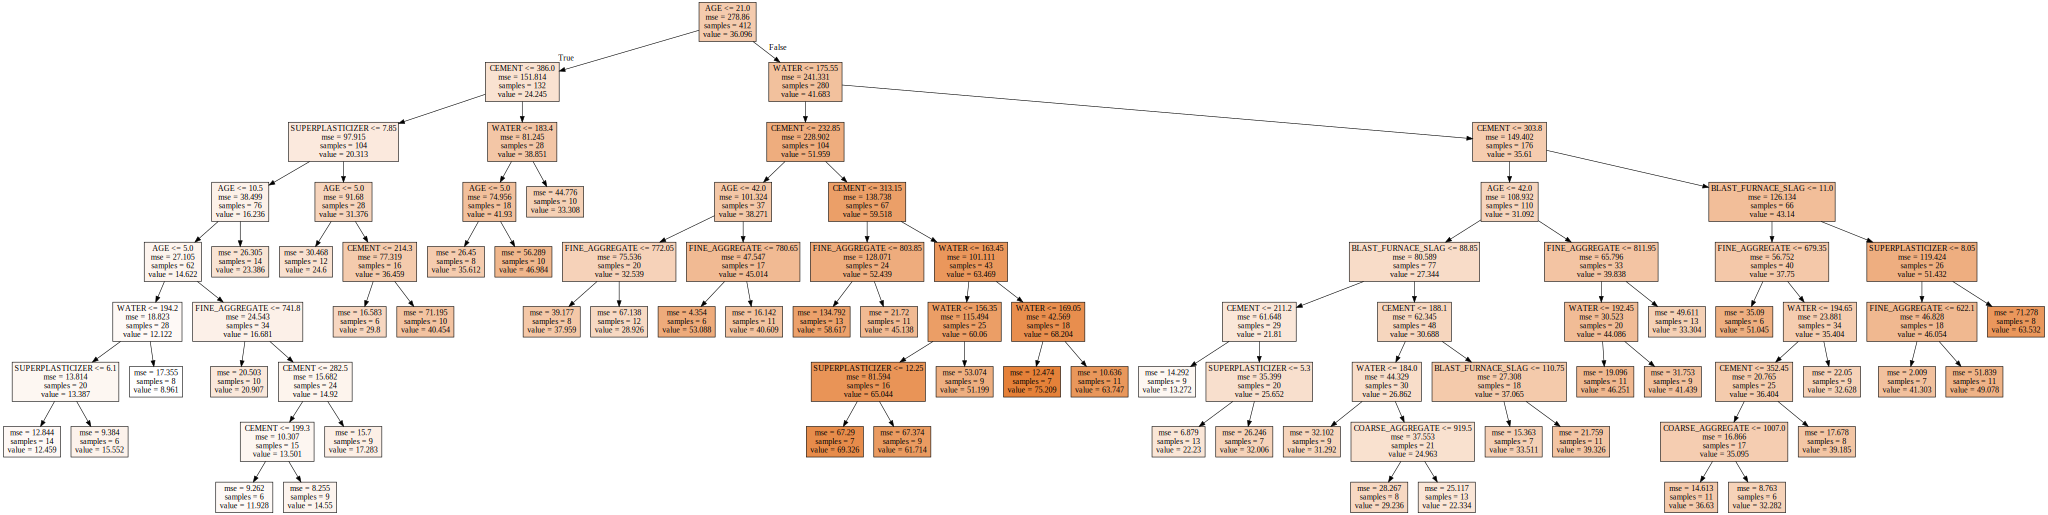

In [13]:
# 최대 깊이 = 2 모델
tree_final = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 6, min_samples_split=15, max_depth =8)
tree_final.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = "tree_final.dot",
               feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [14]:
# tree.feature_importances_로 설명변수 중요도 확인 및 데이블 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# feature_importances의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.345
0,CEMENT,0.285
3,WATER,0.206
4,SUPERPLASTICIZER,0.070
6,FINE_AGGREGATE,0.047
1,BLAST_FURNACE_SLAG,0.045
5,COARSE_AGGREGATE,0.003
2,FLY_ASH,0.000


Text(0, 0.5, '변수')

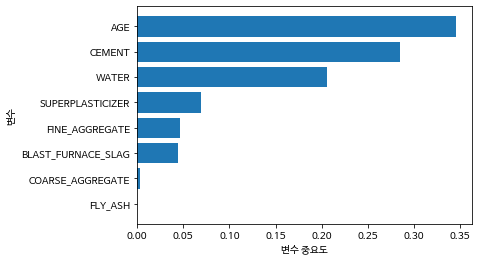

In [15]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [16]:
# tree_uncustomized = DecisionTreeRegressor(random_state=1234)
# tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))

# validation 데이터 설명력
print("Score on validation set: {:.3f}".format(tree_final.score(df_validation_x, df_validation_y)))

# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))




Score on training set: 0.884
Score on validation set: 0.769
Score on test set: 0.767


In [17]:
predict_y = tree_final.predict(df_test_x)

MSE = mean_squared_error(df_test_y, predict_y)
MAE = mean_absolute_error(df_test_y, predict_y)
print("MSE: {:.3f}".format(MSE))
print("MAE: {:.3f}".format(MAE))

MSE: 66.253
MAE: 6.176


In [18]:
estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"],\
                            "max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model: 
DecisionTreeRegressor(criterion='mae', max_depth=10, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

best parameter: 
{'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6}

best score: 
0.684


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# 랜덤 포레스트

In [21]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
df_raw= pd.read_csv("/home/pirl/test/BigData/Concrete.csv", encoding='euc-kr')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [23]:
# 목표 변수, 설명변수 데이터 지정
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis = 1, inplace = False)

In [24]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.6, random_state = 1234)

df_validation_x, df_test_x, df_validation_y, df_test_y = train_test_split(df_test_x, df_test_y
                                                               , test_size = 0.5, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))

print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

print("test data X size : {}".format(df_test_x.shape))
print("test data X size : {}".format(df_test_y .shape))

train data X size : (412, 8)
train data Y size : (412,)
validation data X size : (309, 8)
validation data Y size : (309,)
test data X size : (309, 8)
test data X size : (309,)


### step 2 모델생성
- 기본 옵션으로 모델 생성

In [25]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Train 데이터 설명력
print("Score on validation set: {:.3f}".format(rf_uncustomized.score(df_validation_x, df_validation_y)))


# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.962
Score on validation set: 0.865
Score on test set: 0.849


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 모델 Parameter 조정
- n_estimators: 트리 수 변경에 따른 모델 성능

    n_estimators  TrainScore  ValidationScore
0             10       0.962            0.865
1             20       0.970            0.878
2             30       0.972            0.884
3             40       0.974            0.886
4             50       0.973            0.886
5             60       0.973            0.888
6             70       0.973            0.889
7             80       0.973            0.888
8             90       0.974            0.889
9            100       0.974            0.889
10           110       0.974            0.890
11           120       0.974            0.890
12           130       0.975            0.890
13           140       0.974            0.890
14           150       0.974            0.888
15           160       0.974            0.889
16           170       0.974            0.889
17           180       0.974            0.888
18           190       0.974            0.889
19           200       0.974            0.889


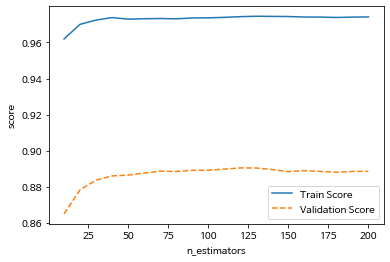

In [29]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimators: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,21)] #참조: para_n_tree: [10,20,30,...,100]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_validation_x, df_validation_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["n_estimators"] = para_n_tree
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = test_score

# 모델 설명력 확인
print(df_score_leaf.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Validation Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

### min_samples_leaf: 잎사귀 노드의 최소 자료 수변경에 따른 모델 성능

    MinSamplesLeaf  TrainScore  Validation
0                1       0.974       0.889
1                2       0.958       0.883
2                3       0.939       0.873
3                4       0.922       0.864
4                5       0.906       0.853
5                6       0.890       0.841
6                7       0.876       0.832
7                8       0.862       0.820
8                9       0.850       0.810
9               10       0.838       0.801
10              11       0.829       0.791
11              12       0.821       0.785
12              13       0.813       0.777
13              14       0.804       0.768
14              15       0.797       0.762
15              16       0.792       0.758
16              17       0.786       0.754
17              18       0.778       0.747
18              19       0.771       0.741
19              20       0.764       0.736


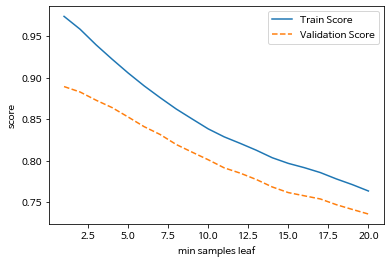

In [31]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)] #참조: para_leaf: [1,2,3,...,20]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 100,
                               min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_validation_x, df_validation_y))
      
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["Validation"] = test_score

# 모델 설명력 확인
print(df_score_leaf.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

# min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

    MinSamplesLeaf  TrainScore  Validation
0                1       0.974       0.889
1                2       0.958       0.883
2                3       0.939       0.873
3                4       0.922       0.864
4                5       0.906       0.853
5                6       0.890       0.841
6                7       0.876       0.832
7                8       0.862       0.820
8                9       0.850       0.810
9               10       0.838       0.801
10              11       0.829       0.791
11              12       0.821       0.785
12              13       0.813       0.777
13              14       0.804       0.768
14              15       0.797       0.762
15              16       0.792       0.758
16              17       0.786       0.754
17              18       0.778       0.747
18              19       0.771       0.741
19              20       0.764       0.736


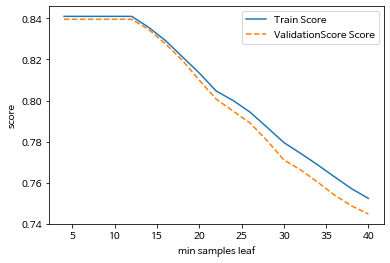

In [33]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_split = [n_split * 2 for n_split in range(2,21)] #참조: para_leaf: [4,6,8,...,40]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 6,
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_validation_x, df_validation_y))
    test_score.append(rf.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = test_score

# 모델 설명력 확인
print(df_score_leaf.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "ValidationScore Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()


# max_depth: 최대 깊이 변경에 따른 모델 성능

   Depth  TrainScore  ValidationScore
0      1       0.338            0.309
1      2       0.598            0.581
2      3       0.733            0.695
3      4       0.812            0.777
4      5       0.858            0.816
5      6       0.877            0.831
6      7       0.882            0.834
7      8       0.883            0.834
8      9       0.884            0.835
9     10       0.884            0.835


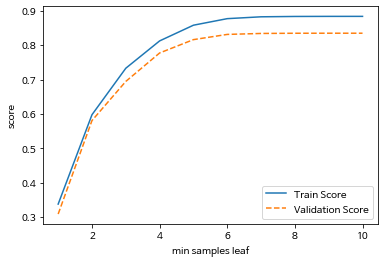

In [36]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [n_depth for n_depth in range(1,11)] 

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 100, 
                               min_samples_leaf = 6, min_samples_split = 14,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["Depth"] = para_depth
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = test_score

# 모델 설명력 확인
print(df_score_split.round(3))


# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()


In [37]:
# 최대 깊이 = 2 모델
rf_final = RandomForestRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 6, 
                                 min_samples_split = 14, max_depth = 4)

rf_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.812
Score on test set: 0.777


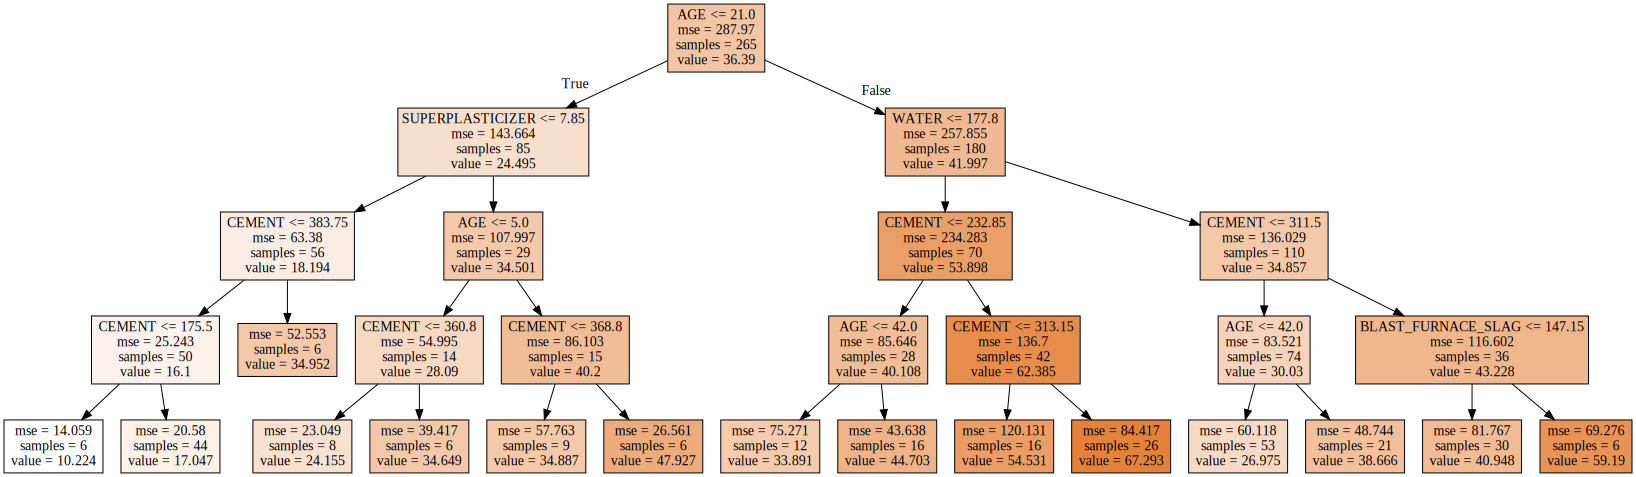

In [38]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot",feature_names= v_feature_name, impurity=True, filled=True)

# tree_final_0.dot 그리기
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

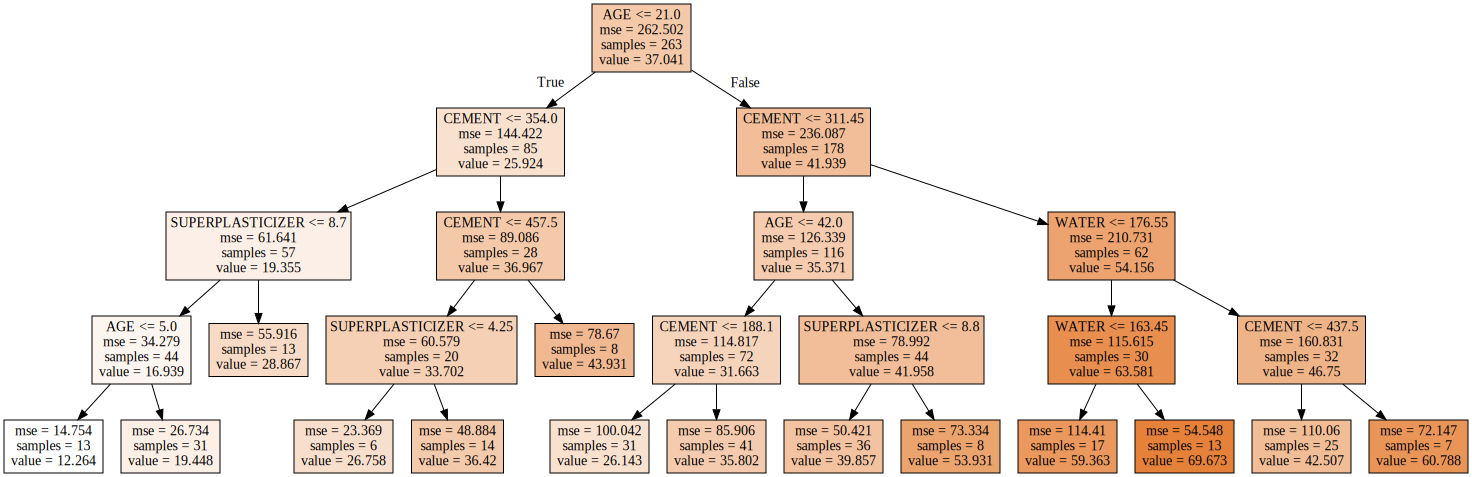

In [39]:
# 1번 트리
export_graphviz(rf_final.estimators_[1], out_file = "rfr_final_1.dot",feature_names= v_feature_name, impurity=True, filled=True)

# tree_final_0.dot 그리기
with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

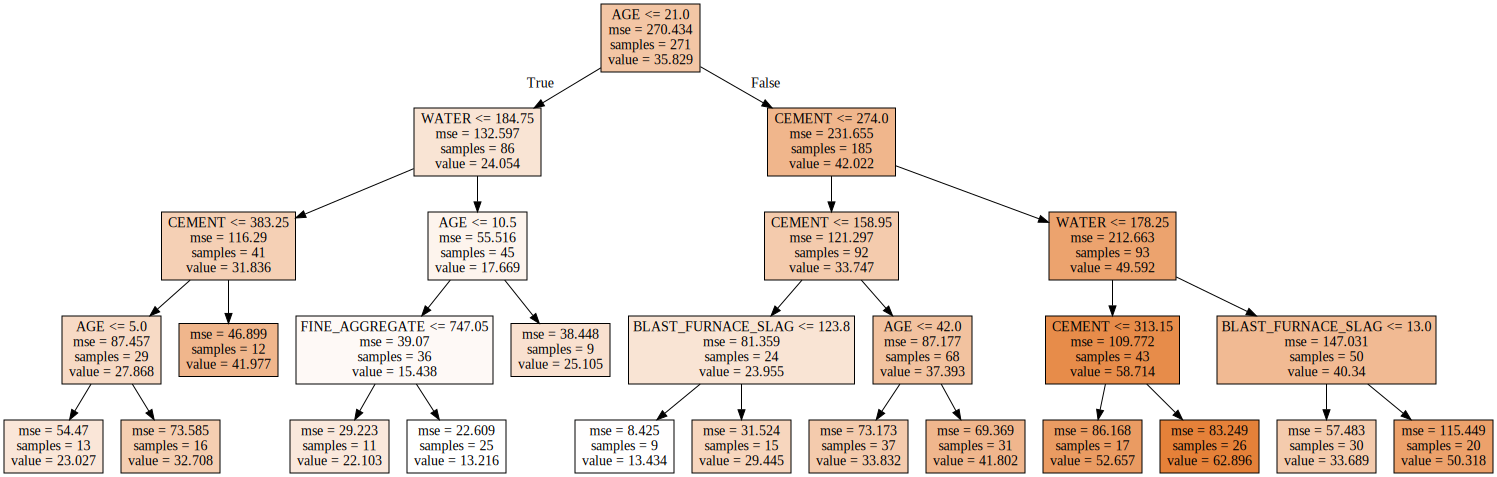

In [40]:
# 10번 트리
export_graphviz(rf_final.estimators_[10], out_file = "rfr_final_10.dot",feature_names= v_feature_name, impurity=True, filled=True)

# tree_final_10.dot 그리기
with open("rfr_final_10.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [41]:
# tree.feature_importances_로 설명변수 중요도 확인 및 데이블 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# feature_importances의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.387
0,CEMENT,0.309
3,WATER,0.187
4,SUPERPLASTICIZER,0.053
1,BLAST_FURNACE_SLAG,0.033
6,FINE_AGGREGATE,0.024
5,COARSE_AGGREGATE,0.004
2,FLY_ASH,0.003


Text(0, 0.5, '변수')

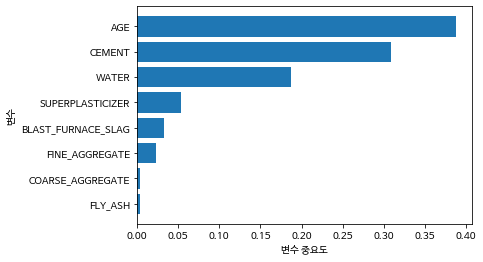

In [42]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [43]:
predict_y = rf_final.predict(df_test_x)

MSE = mean_squared_error(df_test_y, predict_y)
MAE = mean_absolute_error(df_test_y, predict_y)
print("MSE: {:.3f}".format(MSE))
print("MAE: {:.3f}".format(MAE))

MSE: 63.251
MAE: 6.480


# GridSearchCV를 이용한 최적 parameter 찾기

In [44]:
estimator = RandomForestRegressor(random_state = 1234)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}

# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model: 
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}

best score: 
0.792


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
